In [1]:
###importation packages
import numpy as np                   
import matplotlib.pyplot as plt     
import random                       

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


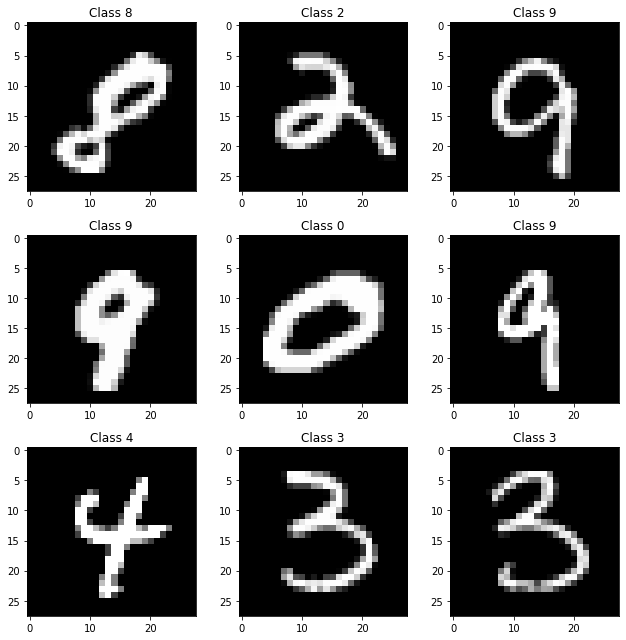

In [3]:
plt.rcParams['figure.figsize'] = (9,9) # pour que les images s'affichent en plus grand dans le notebook

random.seed(3)
nums = [random.randint(0, len(X_train)) for x in range(9)]

for i, num in enumerate(nums):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

In [4]:
# une petite fonction pour afficher les matrices joliment
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[nums[2]])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0   49  138  191  244  138   55   15    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    5   68  228  252  252  253  252  252  219   15    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0  138  252  252  153   69   69   90  202  252   54    0    0  0  0 

In [5]:
###Reformater
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
###variation de la taille de la couche dense
# PARAMETRES 

params = {'dense_size': 68, 
          'dense_layers':4}



In [7]:
model = tf.keras.models.Sequential()

In [8]:
###ajouter des couches
model.add(
    tf.keras.layers.Dense(params['dense_size'], input_shape=(784,))
    ) # une couche dense (fully connected) de taille 64

In [9]:
###variation de la fonction d'activation ReLU
model.add(
    tf.keras.layers.Activation('relu')
    )
###dense_layers et dense_size modifier plus haut 
model.summary()

for l in range(params['dense_layers']): 
  model.add(
    tf.keras.layers.Dense(params['dense_size'])
    )
  model.add(
      tf.keras.layers.Activation('relu')
      )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
Total params: 53,380
Trainable params: 53,380
Non-trainable params: 0
_________________________________________________________________


In [10]:
###variation du dropout (doit etre compris entre 0 et 1)
model.add(
    tf.keras.layers.Dropout(0.4)
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 activation_1 (Activation)   (None, 68)                0         
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 68)                4

In [12]:
###ajouter le classifieur
model.add(
    tf.keras.layers.Dense(10))
model.add(
    tf.keras.layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 activation_1 (Activation)   (None, 68)                0         
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 68)                4

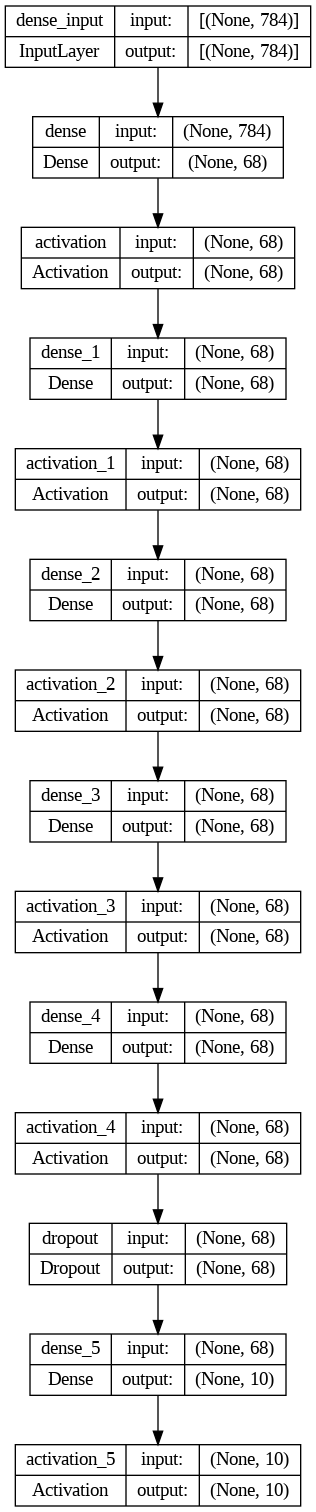

In [13]:
tf.keras.utils.plot_model(model, 'model1.png', show_shapes=True)

In [14]:
###modifier la fonction d'optimisation, compiler le modele
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adamax', 
              metrics=['accuracy'])

In [16]:
###entrainer le model, modifier la taille ds batchs
model.fit(X_train,        # input
          Y_train,        # output
          batch_size=64, # taille des minibatches
          epochs=10,       # nombre d'epochs (passages sur les données )
          verbose=1)      # option paramètrant la quantité d'informations à afficher pendant l'entrainement

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1269 - accuracy: 0.9657
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1131 - accuracy: 0.9691
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1030 - accuracy: 0.9721
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0948 - accuracy: 0.9742
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0835 - accuracy: 0.9768
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0778 - accuracy: 0.9784
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0718 - accuracy: 0.9801
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0670 - accuracy: 0.9806
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0624 - accuracy: 0.9826
Epoch 10/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0558 - accuracy: 0.9845

In [17]:
###evaluer le modele sur les données test
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9714
Test score: 0.10541738569736481
Test accuracy: 0.9714000225067139


In [18]:
###inspecter les resultats
from sklearn.metrics import classification_report, confusion_matrix

predicted_classes = model.predict(X_test)
predicted_classes

313/313 [==============================] - 1s 2ms/step


array([[6.0486500e-09, 1.8338824e-06, 1.1744994e-05, ..., 9.9997777e-01,
        3.9464405e-09, 2.7746207e-06],
       [1.3572144e-08, 1.3555421e-06, 9.9998420e-01, ..., 8.4667943e-07,
        6.1380211e-07, 2.2784068e-11],
       [3.7174178e-08, 9.9979520e-01, 1.3491661e-05, ..., 4.1286094e-05,
        4.8190930e-05, 2.2669055e-06],
       ...,
       [9.2316232e-10, 2.1839555e-09, 2.8835085e-09, ..., 1.7051377e-07,
        4.2108061e-10, 8.8059159e-07],
       [1.2384004e-07, 4.4477133e-08, 8.3056900e-10, ..., 4.0450630e-09,
        3.2809039e-05, 1.5043207e-07],
       [1.1682355e-07, 8.8728538e-11, 1.5231011e-09, ..., 2.2026781e-12,
        8.3972978e-08, 6.6237232e-10]], dtype=float32)

In [19]:
predicted_classes = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

313/313 [==============================] - 1s 2ms/step
[[ 972    0    0    1    0    1    1    1    3    1]
 [   0 1119    2    5    0    1    2    1    5    0]
 [   3    1 1004   11    1    1    0    7    4    0]
 [   0    0    5  989    0    4    0    5    4    3]
 [   2    0    5    0  950    0    3    1    1   20]
 [   2    0    0   12    1  859    5    1    6    6]
 [   4    3    1    0    9    7  928    0    6    0]
 [   0    4   14    8    1    0    1  987    2   11]
 [   3    1    6   17    3    5    3    2  929    5]
 [   1    2    0   10    8    2    2    3    4  977]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97  

In [20]:
np.nonzero(predicted_classes != Y_test)[0]

array([  61,  104,  115,  149,  151,  247,  259,  321,  340,  381,  445,
        447,  449,  495,  582,  591,  619,  659,  674,  691,  707,  720,
        740,  810,  881,  900,  938,  947,  951,  965, 1003, 1014, 1032,
       1044, 1112, 1156, 1178, 1181, 1182, 1194, 1226, 1232, 1242, 1247,
       1260, 1289, 1299, 1319, 1326, 1328, 1393, 1395, 1444, 1458, 1464,
       1500, 1522, 1527, 1530, 1549, 1553, 1554, 1569, 1581, 1609, 1641,
       1681, 1709, 1717, 1754, 1790, 1850, 1901, 1941, 1952, 2016, 2024,
       2035, 2043, 2053, 2070, 2093, 2098, 2109, 2125, 2130, 2135, 2182,
       2272, 2293, 2369, 2371, 2387, 2395, 2406, 2422, 2433, 2454, 2488,
       2526, 2607, 2648, 2654, 2721, 2743, 2758, 2877, 2896, 2915, 2921,
       2927, 2939, 2953, 2979, 2995, 3030, 3073, 3117, 3189, 3206, 3225,
       3284, 3330, 3333, 3422, 3451, 3490, 3503, 3520, 3533, 3558, 3567,
       3597, 3629, 3674, 3681, 3702, 3718, 3749, 3751, 3757, 3767, 3772,
       3776, 3780, 3808, 3838, 3853, 3893, 3906, 39

In [21]:
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

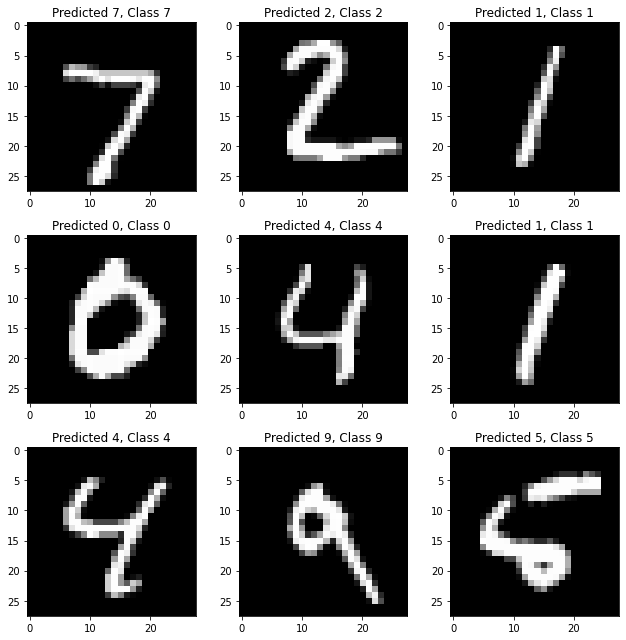

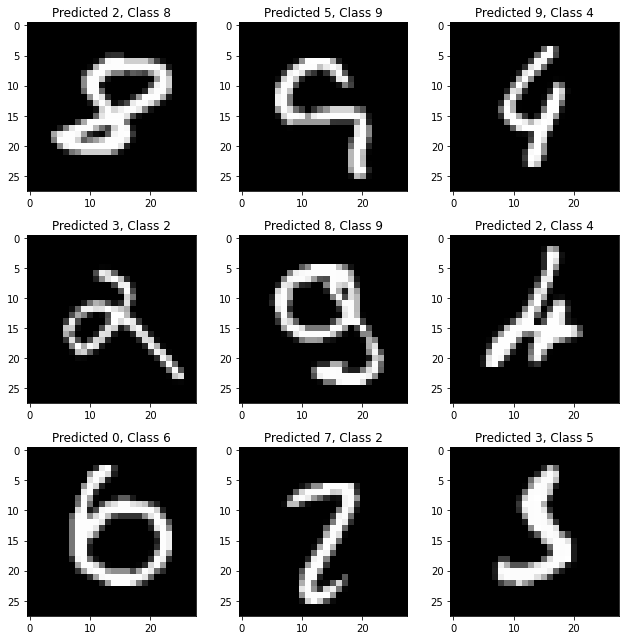

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    
plt.tight_layout()


plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    
plt.tight_layout()

In [23]:
###Convolution, variation des filtres et du kernel

tf.keras.layers.Conv2D(16,                      # on crée 16 filtres
                       (5, 5),                  # kernel de taille (5,5)
                       input_shape=(28,28,1))

In [24]:
###variation du pooling 
tf.keras.layers.MaxPooling2D(pool_size=(3,3))


In [25]:
# Recharger le dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [26]:
###Reformater
X_train = X_train.reshape(60000, 28, 28, 1) # Ajouter une dimension supplémentaire pour représenter la couche unique
X_test = X_test.reshape(10000, 28, 28, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [27]:
model = tf.keras.models.Sequential()                                 

# Convolution Layer 1
model.add(
    tf.keras.layers.Conv2D(16, (5, 5), input_shape=(28,28,1)))            
model.add(
    tf.keras.layers.Activation('relu') )                   

# Convolution Layer 2
model.add(
    tf.keras.layers.Conv2D(16, (5, 5)))                                    
model.add(
    tf.keras.layers.Activation('relu'))                         
model.add(
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)))         

model.add(
    tf.keras.layers.Flatten())                                

# Fully Connected Layer 5
model.add(
    tf.keras.layers.Dense(32))                                               
model.add(
    tf.keras.layers.Activation('relu'))                      

# Fully Connected Layer 6                       
model.add(
    tf.keras.layers.Dropout(0.4))                            
model.add(
    tf.keras.layers.Dense(16))                                
model.add(
    tf.keras.layers.Activation('softmax'))     

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.fit(X_train, Y_train,  epochs=5, verbose=1)
predicted_classes = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.6584 - accuracy: 0.7882
Epoch 2/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2810 - accuracy: 0.9131
Epoch 3/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2242 - accuracy: 0.9308
Epoch 4/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1961 - accuracy: 0.9396
Epoch 5/5
313/313 [==============================] - 4s 13ms/step
[[ 976    0    0    0    0    0    3    1    0    0]
 [   0 1127    1    2    0    0    4    1    0    0]
 [   3    4 1007    1    2    0    1   11    3    0]
 [   1    0    4  983    0   13    0    6    1    2]
 [   1    1    2    0  967    0    3    2    1    5]
 [   1    0    1    5    0  878    5    1    0    1]
 [   7    3    0    0    2    2  944    0    0    0]
 [   1    4   15    2    0    0    0  999    1    6]
 [   7    1    1    2    3    1    2    4  943   10]
 [   3    3    0    2    5    4    0    4    

Epoch 1/5
4020/4020 [==============================] - 90s 22ms/step - loss: 0.1612 - accuracy: 0.9514 - val_loss: 0.0620 - val_accuracy: 0.9813
Epoch 2/5
4020/4020 [==============================] - 85s 21ms/step - loss: 0.1514 - accuracy: 0.9527 - val_loss: 0.0611 - val_accuracy: 0.9826
Epoch 3/5
4020/4020 [==============================] - 82s 20ms/step - loss: 0.1426 - accuracy: 0.9549 - val_loss: 0.0579 - val_accuracy: 0.9828
Epoch 4/5
4020/4020 [==============================] - 84s 21ms/step - loss: 0.1395 - accuracy: 0.9564 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 5/5
4020/4020 [==============================] - 82s 20ms/step - loss: 0.1306 - accuracy: 0.9592 - val_loss: 0.0550 - val_accuracy: 0.9833
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


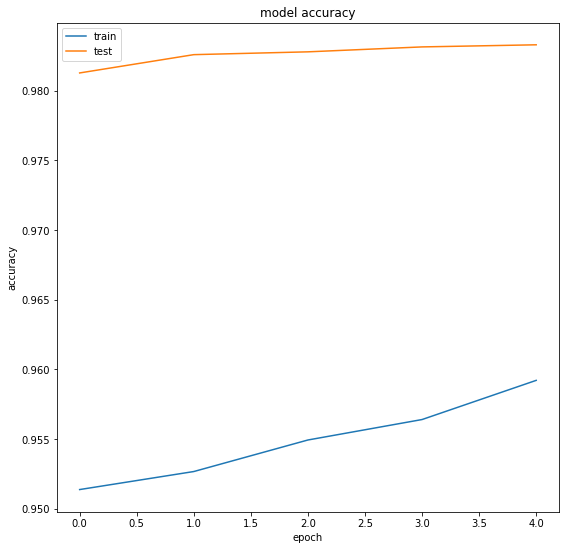

In [29]:
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5, batch_size=10, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 activation_6 (Activation)   (None, 24, 24, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 16)        6416      
                                                                 
 activation_7 (Activation)   (None, 20, 20, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                      